In [1]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [7]:
threshold = 180



train_picture =  '/content/pacman_Train.jpg'
test_picture  = '/content/pacman_Test.jpg'

def binarize_image(image_path):
    
    train_image = Image.open(image_path).convert(mode="L")
    train_image = train_image.resize(size=(100,100))
    
    train_image_arr = np.asarray(train_image,dtype=np.uint8)
    x = np.zeros(train_image_arr.shape,dtype=np.float)
    x[train_image_arr > threshold] = 1
    x[x==0] = -1
    
    return x

In [8]:
train = binarize_imgage(train_picture)
test = binarize_imgage(test_picture)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


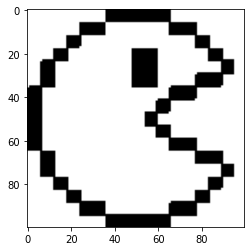

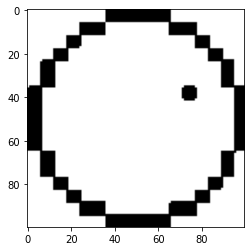

In [9]:
plt.imshow(np.repeat(train[:,:,np.newaxis], repeats=3, axis=2))
plt.show()
plt.imshow(np.repeat(test[:,:,np.newaxis], repeats=3, axis=2))
plt.show()

In [14]:
class Neural_Network(object):

    def __init__(self):
        self.weight = None

    def train(self, data,):
        matrix = np.vstack(data)
        param = len(data) * np.identity(np.size(matrix, 1))
        self.weight = np.dot(matrix.T, matrix) - param

    def prediction(self, data, theta=0.5, iterations=1000):        
        inx = np.random.randint(0, len(self.weight) - 1, (iterations, len(data)))
        for ind in inx:
            tmp = np.diagonal(np.dot(self.weight[ind], data.T))
            tmp = np.expand_dims(tmp, -1)
            val = np.apply_along_axis(lambda x: 1 if x > theta else -1, 1, tmp)

            for i in range(len(data)):
                data[i, ind[i]] = val[i]

        return data

In [15]:
size = (100, 100)
model = Neural_Network()

In [16]:
model.train([train.flatten()])

In [18]:
tr = model.prediction(np.array([test.flatten()], copy=False),iterations=1000)

In [19]:
tr = tr[0].reshape(size)

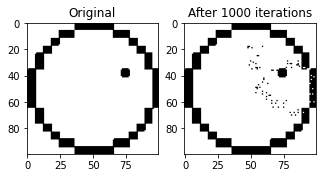

In [20]:
picture = plt.figure(figsize=(8, 8))
picture.add_subplot(1, 3, 1)
plt.imshow(np.repeat(test[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('Original')
picture.add_subplot(1, 3, 2)
plt.imshow(np.repeat(tr[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('After 1000 iterations')
plt.show()

In [21]:
tr = model.prediction(np.array([test.flatten()], copy=False),iterations=30000)

In [22]:
tr = tr[0].reshape(size)


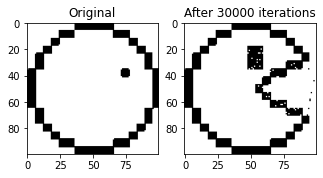

In [23]:
picture = plt.figure(figsize=(8, 8))
picture.add_subplot(1, 3, 1)
plt.imshow(np.repeat(test[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('Original')
picture.add_subplot(1, 3, 2)
plt.imshow(np.repeat(tr[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('After 30000 iterations')
plt.show()


In [26]:
test_2 = binarize_image('/content/ghost.jpg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [27]:
tr = model.prediction(np.array([test_2.flatten()], copy=False),iterations=1000)


In [28]:
tr = tr[0].reshape(size)

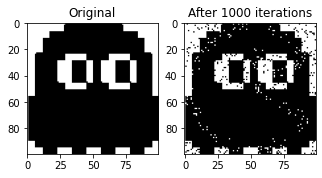

In [29]:
picture = plt.figure(figsize=(8, 8))
picture.add_subplot(1, 3, 1)
plt.imshow(np.repeat(test_2[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('Original')
picture.add_subplot(1, 3, 2)
plt.imshow(np.repeat(tr[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('After 1000 iterations')
plt.show()

In [30]:
tr = model.prediction(np.array([test_2.flatten()], copy=False),iterations=50000)

In [31]:
tr = tr[0].reshape(size)

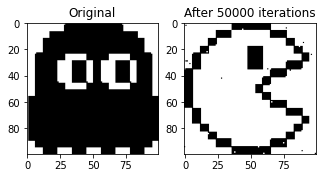

In [32]:
picture = plt.figure(figsize=(8, 8))
picture.add_subplot(1, 3, 1)
plt.imshow(np.repeat(test_2[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('Original')
picture.add_subplot(1, 3, 2)
plt.imshow(tr,cmap='Greys')
plt.title('After 50000 iterations')
plt.show()
